<a href="https://colab.research.google.com/github/charurathour/Data-science-projects/blob/main/ANN_based_Credit_card_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:00<00:00, 55.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1


In [37]:
import os
dataset_path='/root/.cache/kagglehub/datasets/rjmanoj/credit-card-customer-churn-prediction/versions/1'
print(os.listdir(dataset_path))

['Churn_Modelling.csv']


In [38]:
import numpy as np
import pandas as pd
df=pd.read_csv(dataset_path+'/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.shape

(10000, 14)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
df.duplicated().sum()

0

In [42]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [43]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [44]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [45]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [46]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [47]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [48]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [49]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Exited'])
y=df['Exited']
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
X_train.shape

(8000, 11)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [53]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [65]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [78]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8604 - loss: 0.3430 - val_accuracy: 0.8562 - val_loss: 0.3411
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8665 - loss: 0.3313 - val_accuracy: 0.8556 - val_loss: 0.3406
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8646 - loss: 0.3340 - val_accuracy: 0.8556 - val_loss: 0.3410
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8602 - loss: 0.3394 - val_accuracy: 0.8575 - val_loss: 0.3417
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8556 - loss: 0.3491 - val_accuracy: 0.8581 - val_loss: 0.3404
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8584 - loss: 0.3388 - val_accuracy: 0.8575 - val_loss: 0.3404
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8645 - loss: 0.3299 - val_accuracy: 0.8581 - val_loss: 0.3405
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8608 - loss: 0.3352 - val_accuracy: 0.

In [74]:
model.layers[0].get_weights()

[array([[-0.22737513,  0.14574383, -0.27885237, -0.04707394, -0.03151858,
          0.01894694, -0.15819992,  0.23117006,  0.20223287, -0.05269507,
          0.04030859],
        [ 0.14037988,  0.07274061, -0.21390869, -0.41389245, -0.8094331 ,
         -0.06109186,  0.20102374, -0.43593976,  0.22133882, -0.8004685 ,
         -0.85211134],
        [ 0.23004386, -0.02711163, -0.22756831, -0.34395304,  0.22009338,
          0.06516703, -0.46789923,  0.13631323,  0.02210532,  0.06969087,
          0.22760314],
        [-0.1704942 , -0.4342535 ,  0.18910246, -0.08534293, -0.40354759,
          0.2865722 ,  0.42500612, -0.24350102,  0.07595953,  0.1612207 ,
          0.22599974],
        [-0.47564176, -0.43067995,  0.41107762,  0.47370034,  0.05765352,
          1.3313546 ,  0.58657855, -0.00510367,  0.7820326 ,  0.22161259,
          0.13048233],
        [-0.34351593,  0.06918839,  0.32042813,  0.44161242, -0.29249176,
         -0.104412  ,  0.33676004,  0.34665596,  0.07325594, -0.2488852

In [79]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [80]:
y_pred=np.where(y_log>0.5,1,0)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858

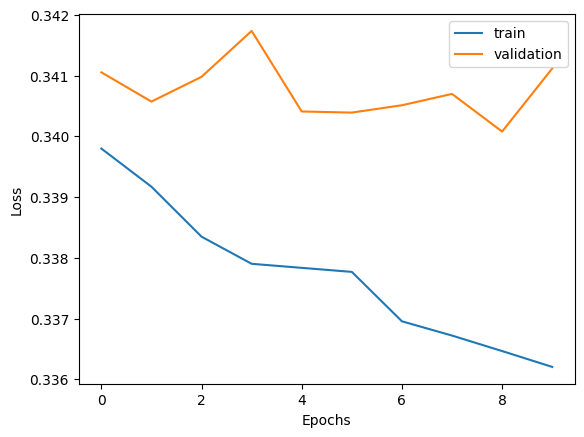

In [82]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'],loc='upper right')
plt.show()

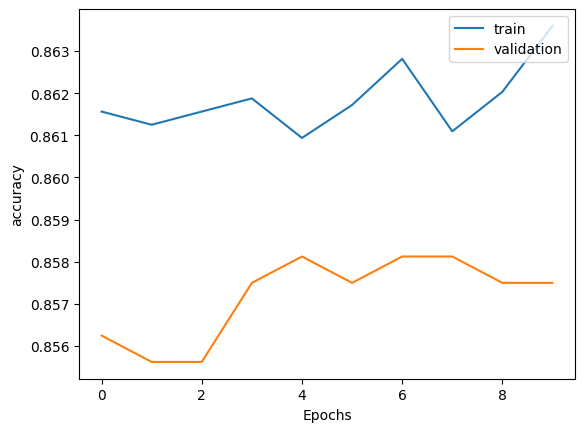

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper right')
plt.show()